# Import libraries

In [ ]:
# Upload File using ipyfilechooser library
from ipyfilechooser import FileChooser
# Get the root directory of the project
from pyprojroot import here
# Copy File
import shutil
# Widget Packages
import ipywidgets as widgets
# In case widget extension not working
# jupyter nbextension enable --py widgetsnbextension
import os

# Data Exploration Section
R2 (Epic): As a user, I want a "Data Exploration" section in the notebook so that I can load and display video data from the TSU project.

## Video Upload / Choose using ipyfilechooser
R2 (Story): As a user, I want to upload/choose files from the data folder through an appropriate UI component (E.g. Browse files) in a notebook code cell so that I can pick and choose the video data I would like to process

In [ ]:
# from ipyfilechooser import FileChooser
def videoselectorinput():
    starting_directory = './data'
    chooser = FileChooser(starting_directory)
    display(chooser)
    return chooser
    
def videoselectoroutput():
    starting_directory = './pipeline/video/output'
    chooser = FileChooser(starting_directory)
    display(chooser)
    return chooser

In [ ]:
video = videoselectorinput()

## Upload selected file to the data folder (If needed)

In [ ]:
# Upload Function
# from pyprojroot import here
# import shutil
def upload(video):
    print(video.selected)
    source = video.selected
    # Source path
    # Destination path
    destination = (here("./data"))

    # Copy file from the selected path
    try:
        shutil.copy(source, destination)
        print("File copied successfully.")

    # If source and destination are same
    except shutil.SameFileError:
        print("Source and destination represents the same file.")

    # If destination is a directory.
    except IsADirectoryError:
        print("Destination is a directory.")

    # If there is any permission issue
    except PermissionError:
        print("Permission denied.")

    # For other errors
    except:
        print("Error occurred while copying file.")

upload(video)

## Video Playback
R2 (Story): As a user, I want to see video playback of the chosen video file in an output cell so that I can check if it is the right video data I would like to process

In [ ]:
# Select Video
video = videoselectorinput()

In [ ]:
print(video.selected)
print(video.selected_filename)
print(video.selected_path)

In [ ]:
from IPython.display import Video

full_path = video.selected
Video(full_path, embed=True, width=540, html_attributes="controls muted autoplay")

# Inference Section

R3 (Epic): As a user, I want to have an "Inference" section in the notebook so that I can perform inference using a pretrained HOI ML model based on the TSU project.

## Load a pretrain model
R3 (Story): As a user, I want to load a pre-trained model using an appropriate UI component so that I can easily load the model.

In [ ]:
"""
Select the model
"""
modelList = [] 

# Select from the list of model in the pipeline/models folder
for x in os.listdir("./pipeline/models"): 
    modelList += [x]

# Widgets
confirmButton = widgets.Button(
    description='Confirm',
    disabled=False,
    button_style='success',
    icon='check'
)
modelDropdown = widgets.Dropdown(
    options=modelList,
    value=modelList[0],
    description='Model:')
# Function on what happen when confirm is been click.
def selectWidgetSet(b):
    print("Selected: " , modelDropdown.value)

confirmButton.on_click(selectWidgetSet)
modelBox = widgets.VBox([widgets.HBox([modelDropdown, confirmButton])])
modelBox

In [ ]:
print(modelDropdown.value)

## Choose Input video to load into TSU Project
R3 (Story): As a user, I want to choose an  input video files and other related input files, using an appropriate UI component, from the TSU project so that the system is able to pass the right files to the model.

In [ ]:
# Select Video
video = videoselectorinput()

In [ ]:
print(video.selected)
print(video.selected_filename)
print(video.selected_path)

## Run the model 
R3 (Story): As a user, I want to see inference results in the form of an output video with captions that indicate the current detected activity in each video frame so that I am able to see the inference results clearly on the screen.

In [ ]:
# Testing
!echo $modelDropdown.value
!echo $video.selected_filename
!echo $video.selected
# Get the directory of the loadmodel
loadmodel = './models/' + modelDropdown.value
!echo $loadmodel

In [ ]:
!cd ./pipeline && python test.py -input_video_full_path $video.selected -input_video_file $video.selected_filename -model $modelDropdown.value -load_model $loadmodel

## Output Video to view the inference result 

In [ ]:
# Select output video
video = videoselectoroutput()

In [ ]:
print(video.selected)
print(video.selected_filename)
print(video.selected_path)

In [ ]:
from IPython.display import Video

full_path = video.selected
Video(full_path, embed=True, width=540, html_attributes="controls muted autoplay")

# Trainng Section
R4 (Epic): As a user, I want to create a "Training" section in the netbook so that I can train a HOI ML model based on the TSU project.

# Testing Section
R5 (Epic): As a user, I want to have a "Testing" section in the notebook so that I can evaluate a trained model based on the TSU project.

# NVIDIA STEP Section
R6 (Epic): As a user, I want to able to configure the notebook using appropriate UI elements coupled with the right .py modules so that R2-5 can be performed based on another pipeline, e.g., the NVIDIA STEP pipeline 

## Pipeline Selection
R6(Story): As a user, I want to create appropriate UI elements to allow for switching pipelines so that I can test the different models



## Nvidida Step Pipeline
R6(Story): As a user, I want to ensure selected pipeline's dependencies are changed to ensure the right dependencies are given to the appropriate models so that the selected model will be run

In [ ]:
%cd ./NVIDIA-STEP-MODEL/STEP

In [2]:
!pip install ninja

In [3]:
!pip install cuda-python

     ---------------------------------------- 6.8/6.8 MB 18.8 MB/s eta 0:00:00
     ------------------------------------- 986.3/986.3 kB 20.8 MB/s eta 0:00:00


In [5]:
!ipython setup.py build develop

C:\Users\Sisters\anaconda3\envs\ict3104\lib\site-packages\IPython\core\interactiveshell.py:852: UserWarning: Attempting to work in a virtualenv. If you encounter problems, please install IPython inside the virtualenv.
  warn(
C:\Users\Sisters\source\repos\ict3104-team05-2022\venv\Lib\site-packages\torch\utils\cpp_extension.py:316: UserWarning: Error checking compiler version for cl: [WinError 2] The system cannot find the file specified
  warnings.warn(f'Error checking compiler version for {compiler}: {error}')


running build
running build_py
running build_ext
building 'external.maskrcnn_benchmark.roi_layers._C' extension
Emitting ninja build file C:\Users\Sisters\source\repos\ict3104-team05-2022\NVIDIA-STEP-MODEL\STEP\build\temp.win-amd64-3.8\Release\build.ninja...
Compiling objects...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
[1/3] cl /showIncludes /nologo /Ox /W3 /GL /DNDEBUG /MD /MD /wd4819 /wd4251 /wd4244 /wd4267 /wd4275 /wd4018 /wd4190 /EHsc -IC:\Users\Sisters\source\repos\ict3104-team05-2022\NVIDIA-STEP-MODEL\STEP\external/maskrcnn_benchmark/csrc -IC:\Users\Sisters\source\repos\ict3104-team05-2022\venv\Lib\site-packages\torch\include -IC:\Users\Sisters\source\repos\ict3104-team05-2022\venv\Lib\site-packages\torch\include\torch\csrc\api\include -IC:\Users\Sisters\source\repos\ict3104-team05-2022\venv\Lib\site-packages\torch\include\TH -IC:\Users\Sisters\source\repos\ict3104-team05-2022\venv\Lib\site-packages\torch\in

In [5]:
!python demo.py

Loading pretrain model from pretrained/ava_step.pth
Building I3D model...
Building I3D head for global branch...
Building I3D head for global branch...
Building I3D head for global branch...
Building I3D head for context branch...
Datalist len:  2
{'video_name': '1', 'fid': 0}
{'video_name': '2', 'fid': 0}
Batch time:  18.252089738845825


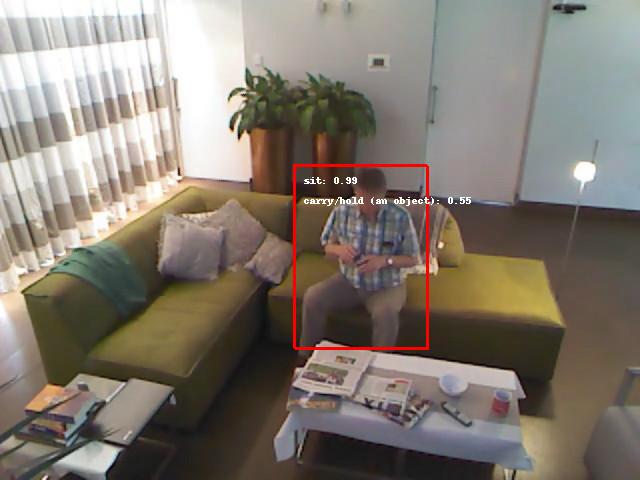

In [6]:
from IPython.display import Image
Image(filename='datasets/demo/frames/results/2/frame0000.jpg') 